In [2]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 6:  Linear Algebra Part 1

## Question 1

The Frobenius norm $\|\cdot\|_F$ of a matrix $A\in\mathbb R^{m\times n}$ is defined as

$$
  \|A\|_F := \left( \sum_{i=1}^m\sum_{j=1}^n |a_{ij}|^2\right )^{1/2}.
$$

**(a)** (10 points) - Show that $\|\cdot\|_F$ is indeed a norm on $\mathbb R^{m\times n}$ (show that it follows the definition and properties of a matrix norm).

**Solution**

**Property 1: $||A|| \geq 0$ and $||A|| = 0$ only if $A = 0$:**

$$\|A\|_F = \left( \sum_{i=1}^m\sum_{j=1}^n |a_{ij}|^2\right )^{1/2} \geq 0 \:\: \checkmark$$
$$\|A\|_F = \left( \sum_{i=1}^m\sum_{j=1}^n |a_{ij}|^2\right )^{1/2} = 0 \text{ if and only if } A = 0 \:\: \checkmark$$

**Property 2: $||A + B|| \leq ||A|| + ||B||$ (Triangle Inequality):**

$$\|A+B\|_F = \left( \sum_{i=1}^m\sum_{j=1}^n |a_{ij}+b_{ij}|^2\right )^{1/2}$$
$$\|A+B\|_F^2= \left( \sum_{i=1}^m\sum_{j=1}^n |a_{ij}|^2+2|a_{ij}||b_{ij}|+|b_{ij}|^2\right )$$
$$\|A+B\|_F^2= \sum_{i=1}^m\sum_{j=1}^n |a_{ij}|^2+2\sum_{i=1}^m\sum_{j=1}^n|a_{ij}||b_{ij}|+\sum_{i=1}^m\sum_{j=1}^n|b_{ij}|^2$$

By Cauchy-Schwarz Inequality, this result is less than:

$$\leq \sum_{i=1}^m\sum_{j=1}^n |a_{ij}|^2+2\left (\sum_{i=1}^m\sum_{j=1}^n|a_{ij}|^2\right)^{1/2}\left( \sum_{i=1}^m\sum_{j=1}^n|b_{ij}|^2\right)^{1/2}+\sum_{i=1}^m\sum_{j=1}^n|b_{ij}|^2$$
$$\leq \left( \left (\sum_{i=1}^m\sum_{j=1}^n|a_{ij}|^2\right)^{1/2}+\left( \sum_{i=1}^m\sum_{j=1}^n|b_{ij}|^2\right)^{1/2} \right) ^2$$

Therefore we have triangle inequality:

$$\|A+B\|_F \leq \|A\|_F  + \|B\|_F \:\: \checkmark $$

**Property 3: $||c A|| = |c| ||A||$:**

$$\|cA\|_F = \left( \sum_{i=1}^m\sum_{j=1}^n |ca_{ij}|^2\right )^{1/2} = \left( \sum_{i=1}^m\sum_{j=1}^n |c|^2|a_{ij}|^2\right )^{1/2} = |c|^2\left( \sum_{i=1}^m\sum_{j=1}^n |a_{ij}|^2\right )^{1/2} = c\|A\|_F \:\: \checkmark$$

**(b)** (10 points) - Show that the Frobenius norm fulfills the following inequality 
$$
 \|Ax\|_2 \leq \|A\|_F \cdot \|x\|_2 \qquad \text{for all }A\in\mathbb R^{m\times n}, x\in \mathbb R^n,
$$
where $\|\cdot\|_2$ is the Euclidean norm.

**Solution**

We know that:

$$\|Ax\|_2 = || \sum^n_{j=1} a_j x_j ||_2 \leq \sum^n_{j=1} |x_j| ||a_j||_2$$

By Cauchy Schwarz Inequality: $\sum^n_{i=1} x_i y_i \leq \left( \sum^n_{i=1} x_i^2 \right)^{\frac{1}{2}}\left( \sum^n_{i=1} y_i^2 \right)^{\frac{1}{2}}$:

$$\|Ax\|_2 \leq \left( \sum^n_{j=1} |x_j|^2 \right)^{\frac{1}{2}}\left( \sum^n_{j=1} |a_j|^2 \right)^{\frac{1}{2}}$$

Now if we expand out the Frobenius norm and the euclidean norm:

$$\|A\|_F \cdot \|x\|_2 = \left( \sum_{i=1}^m\sum_{j=1}^n |a_{ij}|^2\right )^{1/2} \cdot  \left( \sum^m_{i=1} |x_i|^2 \right)^{\frac{1}{2}}$$

$$\|A\|_F \cdot \|x\|_2 = \left(\sum^m_{i=1} |x_i|^2 \sum^n_{j=1} |a_{ij}|^2\right)^{\frac{1}{2}}$$

$$\|Ax\|_2 \leq \left( \sum^n_{j=1} |x_j|^2 \right)^{\frac{1}{2}}\left( \sum^n_{j=1} |a_j|^2 \right)^{\frac{1}{2}} \leq \|A\|_F \cdot \|x\|_2$$

## Question 2

Vector and matrix $p$-norms are related by various inequalities, often involving the dimensions $m$ or $n$.  For each of the following, verify the inequality and give an example of a nonzero vector or matrix (for general $m$ and $n$) for which equality is achieved.  In this problem $x \in \mathbb R^m$ and $A \in \mathbb R^{m \times n}$.

**(a)** (10 points) - $||x||_\infty \leq ||x||_2$

**Solution**

We know that $||x||_\infty = \max |x_i|$ and $||x||_2 = \left( \sum^m_{i=1} |x_i|^2 \right)^{1/2}$:

$$ \max |x_i| \leq \left( \sum^m_{i=1} |x_i|^2 \right)^{1/2}$$

This must be true as the maximum of $x_i$ will be in our sum. All other values are squared so there can be no negative numbers and thus the lowest value the euclidean norm can be is the max itself (all other entries are 0).

Example:

$$v = \begin{bmatrix}0 \\ 4 \end{bmatrix}$$

$$||x||_\infty = \max |x_i| = 4$$
$$||x||_2 = \left( \sum^m_{i=1} |x_i|^2 \right)^{1/2} = \sqrt{0^2 + 4^2} = 4$$



**(b)** (10 points) - $||x||_2 \leq \sqrt{m} ||x||_\infty$

**Solution**

We know that $||x||_\infty = \max |x_i|$ and $||x||_2 = \left( \sum^m_{i=1} |x_i|^2 \right)^{1/2}$:

$$ \left( \sum^m_{i=1} |x_i|^2 \right)^{1/2} \leq \sqrt{m}\max |x_i|$$
$$ \sum^m_{i=1} |x_i|^2 \leq m(\max |x_i|)^2$$

Let the vector be ordered such that the last element is the max: $x_m = x_{max}$

$$x_1^2 + x_2^2 + ... + x_{m-1}^2 + x_{max}^2 \leq m x_{max}^2$$

Since every value, $x_1, x_2, ... x_{m-1}$ is less than or equal to $x_{max}$, the largest their sum can be will be just $(m-1)x_{max}$ since the highest they will be is if each element is $x_{max}$ itself.

Thus, subtracting $x_{max}^2$ off each side

$$x_1^2 + x_2^2 + ... + x_{m-1}^2 \leq (m-1) x_{max}^2$$

is always true.

Example:

$$v = \begin{bmatrix}2 \\ 2 \\ 2 \\ 2\end{bmatrix}$$

$$||x||_\infty = \max |x_i| = 2$$
$$||x||_2 = \left( \sum^m_{i=1} |x_i|^2 \right)^{1/2} = \sqrt{4 + 4 + 4 + 4} = 4$$

$$||x||_2 \leq \sqrt{m} ||x||_\infty \rightarrow 4 = 4 \:\: \checkmark$$


**(c)** (10 points) - $||A||_\infty \leq \sqrt{n} ||A||_2$

**Solution**

$$||A||_{\infty} = \max_{1 \leq i \leq m} ||a^\ast_i||_1 = \max_i \sum^n_{j} |a_{ij}|$$

Let v be a vector of from $v = (1,1,1,...,1)^T$:

$$\max_i \sum^n_{j} |a_{ij}| = ||Av||_\infty \leq ||Av||_2 \leq ||A||_2||v||_2 = \sqrt{n}||A||_2 $$

Example (from class):

$$A = \begin{bmatrix} 1 & 2 \\ 0 & 2 \end{bmatrix}$$

$$
    A^\ast A = \begin{bmatrix} 1 & 0 \\ 2 & 2 \end{bmatrix} \begin{bmatrix} 1 & 2 \\ 0 & 2 \end{bmatrix} = \begin{bmatrix} 1 & 2 \\ 2 & 8 \end{bmatrix}
$$
which has eigenvalues 
$$
    \lambda = \frac{1}{2}\left(9 \pm \sqrt{65}\right )
$$
so $||A||_2 \approx 2.9208096$.

$||A||_{\infty} = \max_{1 \leq i \leq m} ||a^\ast_i||_1$ where $a^\ast_i$ is the $i$th row of $A$.  This represents then the maximum of the row sums of $A$.  Therefore $||A||_\infty = 3$.

Thus:

$$||A||_\infty \leq \sqrt{n} ||A||_2 \rightarrow 3 \leq \sqrt{2} * 2.92 \:\: \checkmark$$


**(d)** (10 points) - $||A||_2 \leq \sqrt{m} ||A||_\infty$

**Solution**

We know that:

$$||A||_p = max \frac{||Ax||_p}{||x||_p}$$

Above we found that:

$$||x||_\infty \leq ||x||_2 \leq \sqrt{m} ||x||_\infty$$

Using this information we find:

$$||A||_2 = max \frac{||Ax||_2}{||x||_2} \leq max \frac{\sqrt{m}||Ax||_ \infty}{||x||_2} \leq max \frac{\sqrt{m}||Ax||_ \infty}{||x||_\infty} $$

$$||A||_2 \leq \sqrt{m} ||A||_\infty$$

Example:

Again using the numbers from class above we see that:

$$||A||_2 \leq \sqrt{m} ||A||_\infty \rightarrow 2.92 \leq \sqrt{2} * 3 \:\: \checkmark$$


## Question 3

(15 points) - Write a function that computes the least-squares fit of a given polynomial order $n$ without using the function `numpy.linalg.lstsq` and `numpy.vander` (i.e. construct the system that needs to be solved yourself).  This function should return the coefficients of the resulting polynomial in accending order of powers.  If the function does not receive valid input (most notably an underconstrained system) raise a `ValueError` with an appropriate error message.  Make sure to mention this in your `doc-string`.  

Also write a function that plots the resulting polynomial along with the data given the data, a set of $x$ points and the coefficients from the first function.  Make sure to label your plot (both the axes and with a legend).

In [3]:
def compute_lstsq(data, n):
    """Computes the coefficients of a least-squares fit polynomial of order n
    
    :Input:
     - *data* (ndarray) - Given data x's and y's
     - *n* (integer) - Order of the polynomial
     
    :Output:
     - *p* (ndarray) - Coefficients of the least-squares polynomial
    """
    ### INSERT CODE HERE
    #Check if there are enough data points
    m = data.shape[0]
    if n > m - 1:
        raise ValueError("Error: underconstrained system")
    
    #initialize Vandermonde matrix
    A = numpy.zeros((m, n+1))
    for i in xrange(m):
        for j in xrange(n+1):
            A[i][j] = data[i][0]**j
    
    #Householder Triangularization - from class code
    R = A.copy()
    v = numpy.empty(A.shape)
    m, n = A.shape
    for k in xrange(n):
        x = R[k:, k]
        e1 = numpy.zeros(x.shape)
        e1[0] = 1.0
        v[k:, k] = numpy.sign(x[0]) * numpy.linalg.norm(x, ord=2) * e1 + x
        v[k:, k] = v[k:, k] / numpy.linalg.norm(v[k:, k], ord=2)
        R[k:, k:] -= 2.0 * numpy.dot(numpy.outer(v[k:, k], v[k:, k]), R[k:, k:])

    # Form Q
    m, n = A.shape
    Q = numpy.zeros(A.shape)
    for i in xrange(n):
        en = numpy.zeros(m)
        en[i] = 1.0
        for j in xrange(n - 1, -1, -1):
            en[j:m] -= 2.0 * numpy.dot(numpy.outer(v[j:, j], v[j:, j]), en[j:m])
        Q[:, i] = en 
    
    #print "Householder (reduced) Q = "
    #print Q
    #print "Householder (full) R = "
    #print R
    
    #p_2 = numpy.linalg.solve(R, numpy.dot(numpy.transpose(Q), data[:,1]))
    p = numpy.zeros(n)
    y = data[:,1]
    b = numpy.dot(numpy.transpose(Q), y)
    
    #back substitution to get coefficients
    p[n-1] = b[n-1] / R[n-1][n-1]
    for i in range(n-2, -1, -1):
        back_sub_sum = b[i]
        for j in range(i+1, n):
            back_sub_sum = back_sub_sum - R[i][j]*p[j]
        p[i] = back_sub_sum / R[i][i]
    return p

def plot_lstsq(data, x, p):
    ### INSERT CODE HERE
    def f(x, p):
        poly_sum = 0.
        for i in xrange(len(p)):
            poly_sum += p[i] * x**i
        return poly_sum
        
    fig = plt.figure()
    axes = fig.add_subplot(1,1,1)
    axes.plot(data[:,0], data[:,1], 'ro', label="Data Points")
    axes.plot(x, f(x,p), 'b', label="least square fit")
    axes.set_title("Least Squares using QR Factorization")
    axes.set_ylabel("y")
    axes.set_xlabel("x")
    plt.legend()
    plt.show()

Success!


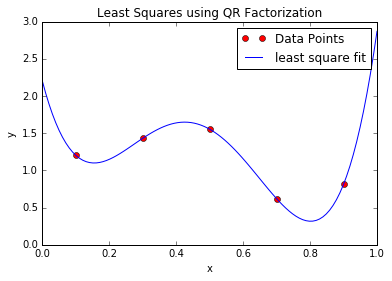

In [4]:
try:
    N = 5
    N_p = 4
    data = numpy.empty((N, 2))
    data[:, 0] = numpy.random.uniform(size=N)
    data[:, 0] = numpy.linspace(0.1, 0.9, N)
    data[:, 1] = numpy.sin(numpy.exp(-data[:, 0]**2)) + numpy.random.uniform(size=N)
    p = compute_lstsq(data, N_p)
except ValueError as e:
    raise e
else:
    P = numpy.zeros(N)
    for n in xrange(N):
        P += p[n] * data[:, 0]**n
    numpy.testing.assert_allclose(P, data[:, 1])
    print "Success!"

    # Plot result
    x = numpy.linspace(0.0, 1.0, 100)
    plot_lstsq(data, x, p)
    plt.show()

Success!


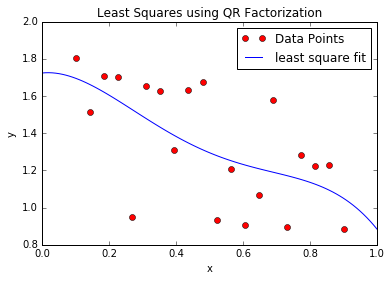

In [5]:
try:
    N = 20
    N_p = 4
    data = numpy.empty((N, 2))
    data[:, 0] = numpy.random.uniform(size=N)
    data[:, 0] = numpy.linspace(0.1, 0.9, N)
    data[:, 1] = numpy.sin(numpy.exp(-data[:, 0]**2)) + numpy.random.uniform(size=N)
    p = compute_lstsq(data, N_p)
except ValueError as e:
    print e
else:
    A = numpy.vander(data[:,0], N_p + 1)
    numpy.testing.assert_allclose(p, numpy.flipud(numpy.linalg.lstsq(A, data[:, 1])[0]))
    print "Success!"

    # Plot result
    x = numpy.linspace(0.0, 1.0, 100)
    plot_lstsq(data, x, p)
    plt.show()

In [6]:
try:
    N = 5
    N_p = 6
    data = numpy.empty((N, 2))
    data[:, 0] = numpy.random.uniform(size=N)
    data[:, 0] = numpy.linspace(0.1, 0.9, N)
    data[:, 1] = numpy.sin(numpy.exp(-data[:, 0]**2)) + numpy.random.uniform(size=N)
    p = compute_lstsq(data, N_p)
except ValueError as e:
    print e
else:
    A = numpy.vander(data[:,0], N_p + 1)
    numpy.testing.assert_allclose(p, numpy.flipud(numpy.linalg.lstsq(A, data[:, 1])[0]))
    print "Success!"

    # Plot result
    x = numpy.linspace(0.0, 1.0, 100)
    plot_lstsq(data, x, p)
    plt.show()
    assert(False)

Error: underconstrained system


## Question 4

Consider a square matrix that looks like
$$
    A = \frac{1}{\Delta x^2} \begin{bmatrix}
        -2 &  1 &  ~ &  ~ &  ~ &  ~ &  ~ \\
         1 & -2 &  1 &  ~ &  ~ &  ~ &  ~ \\
         ~ &  1 & -2 &  1 &  ~ &  ~ &  ~ \\
         ~ &  ~ & \ddots & \ddots & \ddots & ~ & ~\\
         ~ &  ~ & ~ & 1 & -2 & 1 & ~ \\
         ~ &  ~ & ~ & ~ & 1 & -2 & 1 \\
         ~ &  ~ & ~ & ~ &  ~ & 1 & -2 \\
    \end{bmatrix}
$$
This matrix can be characterized as having $A_{ii} = -2$, $A_{ii-1} = A_{ii+1} = 1$ so that the "main" diagonal has the value -2 and the secondary-diagonals are 1 (these are the diagonals that are just above and below the main diagonal).  This matrix is from a discretization of the second derivative using a second order finite difference formula (hence the values of 1, -2, and 1 and the $\Delta x^2$ factor) with boundary conditions set to 0.  

**(a)** (10 points) - Write a function that computes the eigenvalues of the matrix above using whatever functions you would like.  The function should take in the size of the matrix $m$ (the matrix should be square) and the value of $\Delta x$ and return the eigenvalues.

In [7]:
def compute_eigenvalues(m, dx):
    """Computes the eigenvalues of an mxm matrix of form above
    
    :Input:
     - *m* (integer) - dimensions of our square matrix
     - *dx* (float) - dx value to use
     
    :Output:
     - *eig_values* (ndarray) - array of all eigenvalues of the matrix
    """
    ### INSERT CODE HERE
    A = numpy.zeros((m,m))
    for i in xrange(m):
        A[i][i] = -2
        if i+1 < m:
            A[i][i+1] = 1
        if i - 1 > -1:
            A[i][i-1] = 1
    
    eig_values = numpy.linalg.eigvals(A) / (dx)**2
    return eig_values

In [8]:
# Compare against analytical values
m = 10
dx = 1.0 / (m + 1)
eig_values = numpy.flipud(numpy.sort(compute_eigenvalues(m, dx)))
p = numpy.arange(1, m + 1)
numpy.testing.assert_allclose(eig_values,
    2.0 / dx**2 * (numpy.cos(p * numpy.pi * dx) - 1.0))
print "Success!"

Success!


**(b)** (5 points) - Plot the eigenvalues in the complex plane for $m=30$ and $\Delta x = 1/31$.  Make sure to plot the axes and label everything appropriately.

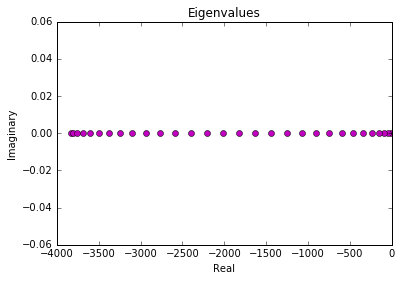

In [9]:
### INSERT CODE HERE
fig = plt.figure()

axes = fig.add_subplot(1,1,1)
eigen_vals = compute_eigenvalues(30, 1.0/31.0)
for val in eigen_vals:
    axes.plot(val.real, val.imag, 'mo')

axes.set_xlabel("Real")
axes.set_ylabel("Imaginary")
axes.set_title("Eigenvalues")
plt.show()

**(c)** (10 points) - Think of the above matrix as specifying a system of ODEs.  The exact eigenvalues of the matrix are
$$
    \lambda_p = \frac{2}{\Delta x^2} (\cos(p \pi \Delta x) - 1)
$$
for $p = 1, \ldots, m$.  Find an expression for $\max_{p = 1, \ldots, m} |\lambda_p|$.  Based on our understanding of absolute stability what be the maximum time-step we could use for this system of ODEs if we used the forward Euler method?  What about for the backward Euler method?  How does this relate to the absolute stability regions of each method?  Feel free to use a plot of the stability regions to illustrate the point.

**Solution**

To find an expression for the maximum, we can use the fact that $\Delta x = \frac{1}{m+1}$

Therefore, we get:

$$ \lambda_p = 2(m+1)^2 (\cos(\frac{p}{m+1} \pi ) - 1)$$

$|\lambda_p|$ is maximized when $\cos(\frac{p}{m+1} \pi)$ is -1.

Therefore, this occurs at p=m when the angle is closest to $\pi$:

$$\max_{p = 1, \ldots, m} |\lambda_p| = 2(m+1)^2 (\cos(\frac{m}{m+1} \pi ) - 1)$$

Forward Euler Method:

$$\vec{U}_{n+1} = \vec{U}_n + \Delta t \vec{f}(t_n, U_n)$$
$$\vec{U}_{n+1} = (1 + \Delta t \lambda) \vec{U}_n.$$

$$|1 + \Delta t \lambda| \leq 1$$

Thus, the time step restriction must be $\Delta t =  \max_{p = 1, \ldots, m} |\lambda_p|^{-1}$. Forward euler becomes unstable near the imaginary axis or when $\lambda$ is purely imaginary.

This makes sense as the above graph shows that all our eigenvalues are real. Therefore, as the problem gets stiffer, max $\lambda$ becomes larger and our time step must be smaller. 

Backward Euler Method:

$$U_{n+1} = U_n + \Delta t f(t_{n+1}, U_{n+1}).$$

$$\left|\frac{1}{1-\Delta t \lambda}\right| \leq 1$$

$$1 \geq 1-\Delta t \lambda \rightarrow 0 \geq - \Delta t \lambda$$

This will be true for all $\lambda$ since trace is always negative and the determinant will always be positive for any m. Therefore, the eigenvalues must all be negative as the above graph indicates. 

The general plot of the forward euler stability region shows that everything contained in a circle/ball will be stable to it follows that there exists a maximum timestep. On the other hand, the backwards euler stability picture shows that everything outside a circle/ball is stable which therefore means that a time restriction does not exist.